In [96]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation # do the animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML  # display the animation in notebook

# Game of Life 

In [97]:
# values for cell on or off in the grid
alive = 1 # values for cell alive
dead = 0 # value for cell dead
vals = [alive, dead]

### Update grid function

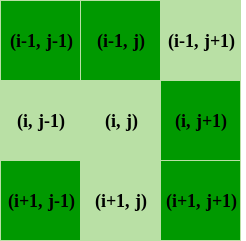

In [98]:
def update_grid(frameNum, img, grid):
    
    grid_tmp = grid.copy() # not to mess up with the original one
    size  =  grid_tmp.shape[0]
    for i in range(size):
        for j in range(size):
            # get the total number of neighbors of the cell
            neighbors = grid[i, (j-1)%size] + grid[i, (j+1)%size] + grid[(i-1)%size, j] + grid[(i+1)%size, j] 
            + grid[(i-1)%size, (j-1)%size] + grid[(i-1)%size, (j+1)%size] + grid[(i+1)%size, (j-1)%size] + grid[(i+1)%size, (j+1)%size]
 
            # check if it is still alive or not
            if grid[i, j] == alive:
                if (neighbors < 2) or (neighbors > 3):
                    grid_tmp[i, j] = dead
            else:
                if neighbors == 3:  # a dead cell with 3 neighbors can reborn
                    grid_tmp[i, j] = alive
 
    # update the image
    img.set_data(grid_tmp)
    grid[:] = grid_tmp[:] # change the old grid
    
    return img

### Grid animation 

In [159]:
def show_GoF(grid):
    # show the grid 
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest', cmap='Greys') 
    plt.show()
    animation_grid = FuncAnimation(fig, update_grid, fargs=(img, grid, ), frames=25, interval=500) # animation  # init_func=create_grid
    #plt.close(animation_grid._fig)
    
    return animation_grid

### Grid generation

In [160]:
# I will use a predefined number, then it could be chosen by the user as input.
# Grid = matrix NxN in a two dimensional space
def create_grid(N=20, pattern='random'):
    # create grid for each case of pattern
    if(pattern == 'random'):
        grid = np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)
        
    # we could create classes for each pattern and return the grid 
        
    return grid

# GoF implementation

In [161]:
# here we can generate the grid with dimension and pattern parameters
# show the grid and the animation
grid = create_grid(N=5)
print(grid)

[[0 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]]


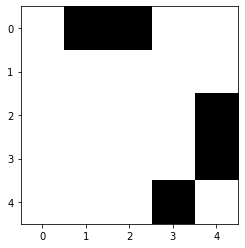

In [162]:
# show the GoF grid animation
animation = show_GoF(grid)
HTML(animation.to_html5_video())